In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')


In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# checking for any nul values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# Visualizations

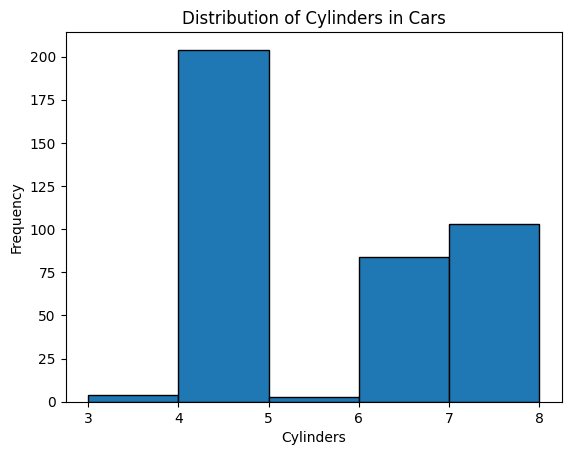

In [8]:
# Univariate Analysis
plt.hist(df['cylinders'], bins=5, edgecolor='black')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.title('Distribution of Cylinders in Cars')
plt.show()

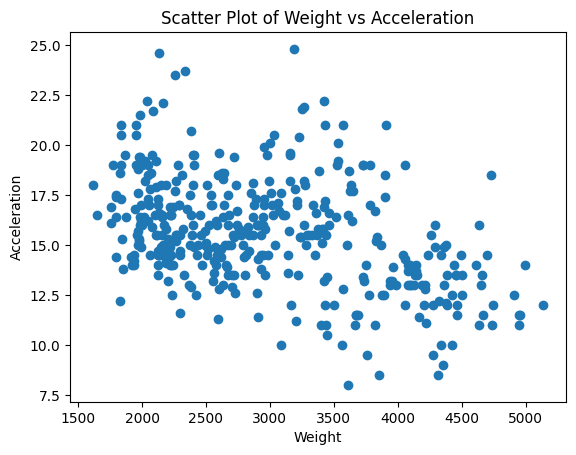

In [6]:
# Bivariate Analysis
plt.scatter(df['weight'], df['acceleration'])
plt.xlabel('Weight')
plt.ylabel('Acceleration')
plt.title('Scatter Plot of Weight vs Acceleration')
plt.show()

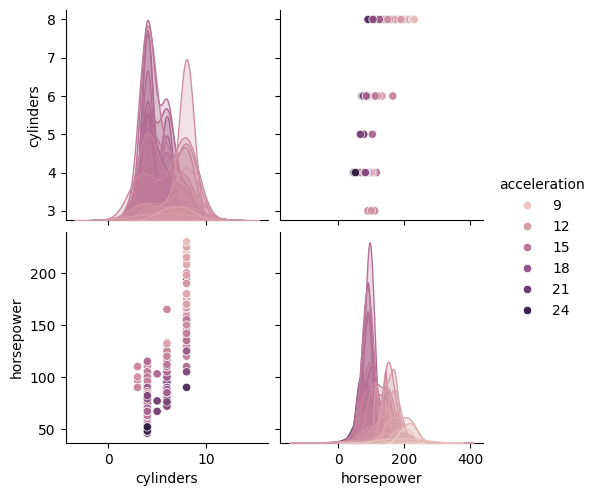

In [9]:
# Multivariate Analysis
df_sub = df[['cylinders', 'horsepower', 'acceleration']]
sns.pairplot(df_sub, hue='acceleration')
plt.show()

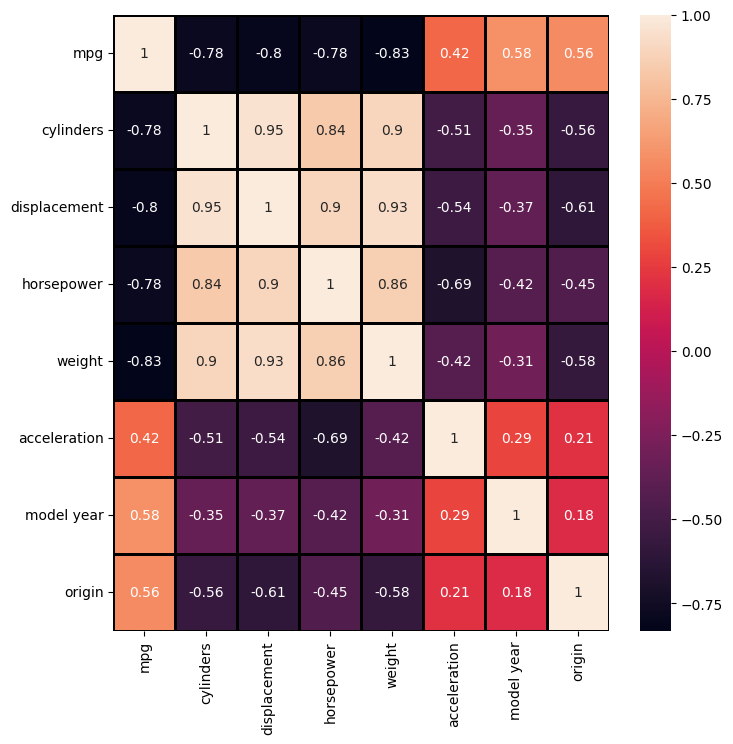

In [10]:
corr_df=df.iloc[:,:-1]
sns.heatmap(corr_df.corr(), annot=True, linecolor = 'black', linewidths = 1)
fig = plt.gcf()
fig.set_size_inches(8,8)

# Descriptive Statistics

In [12]:
# Measures of Central Tendency
print("Mean of data")
corr_df.mean()

Mean of data


mpg               23.514573
cylinders          5.454774
displacement     193.425879
horsepower       104.165829
weight          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64

In [13]:
print("Kurtosis")
corr_df.kurt()

Kurtosis


mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.753032
weight         -0.785529
acceleration    0.419497
model year     -1.181232
origin         -0.817597
dtype: float64

In [15]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
df.mode()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,13.0,4.0,97.0,150.0,1985,14.5,73.0,1.0,ford pinto
1,NaN,NaN,NaN,NaN,2130,NaN,NaN,NaN,NaN


In [16]:
# Measures of Dispersion/Variability
num_cols = df.select_dtypes(include=[np.number]).columns
max_vals = df[num_cols].max()
min_vals = df[num_cols].min()
range = max_vals - min_vals
range

mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
model year        12.0
origin             2.0
dtype: float64

In [18]:
quantile = corr_df.quantile(q=[0.75,0.25])
quantile

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0.75,29.0,8.0,262.00,125.0,3608.00,17.175,79.0,2.0
0.25,17.5,4.0,104.25,75.0,2223.75,13.825,73.0,1.0


In [22]:
IQR = quantile.iloc[0] - quantile.iloc[1]
IQR

mpg               11.50
cylinders          4.00
displacement     157.75
horsepower        50.00
weight          1384.25
acceleration       3.35
model year         6.00
origin             1.00
dtype: float64

In [21]:
upper_extreme = quantile.iloc[0] + (1.5*IQR)
upper_extreme

mpg               46.250
cylinders         14.000
displacement     498.625
horsepower       200.000
weight          5684.375
acceleration      22.200
model year        88.000
origin             3.500
dtype: float64

In [23]:
lower_extreme = quantile.iloc[1] - (1.5* IQR)
lower_extreme

mpg               0.250
cylinders        -2.000
displacement   -132.375
horsepower        0.000
weight          147.375
acceleration      8.800
model year       64.000
origin           -0.500
dtype: float64

In [25]:
print("Variance")
corr_df.var()

Variance


mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1466.788552
weight          717140.990526
acceleration         7.604848
model year          13.672443
origin               0.643292
dtype: float64

In [26]:
print("Standard Deviation")
corr_df.std()

Standard Deviation


mpg               7.815984
cylinders         1.701004
displacement    104.269838
horsepower       38.298676
weight          846.841774
acceleration      2.757689
model year        3.697627
origin            0.802055
dtype: float64

In [27]:
df['car name'].value_counts()

car name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

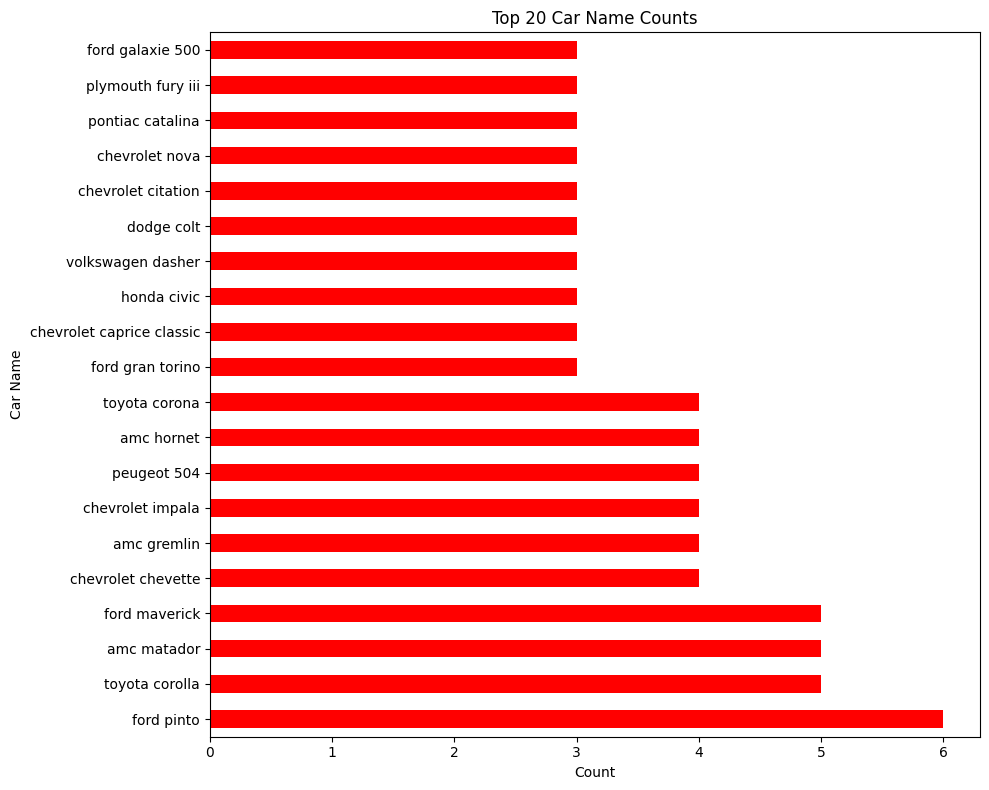

In [43]:
import matplotlib.pyplot as plt

car_counts = df['car name'].value_counts()

# Get the top 20 most frequent categories
top_20_car_counts = car_counts.head(20)

# Plotting
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
top_20_car_counts.plot(kind='barh', color='red')  # Sort values for better readability
plt.title('Top 20 Car Name Counts')
plt.xlabel('Count')
plt.ylabel('Car Name')
plt.tight_layout()
plt.show()


In [44]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Handle Missing Values

In [45]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# Outlier Detection and Replacement

<Axes: ylabel='mpg'>

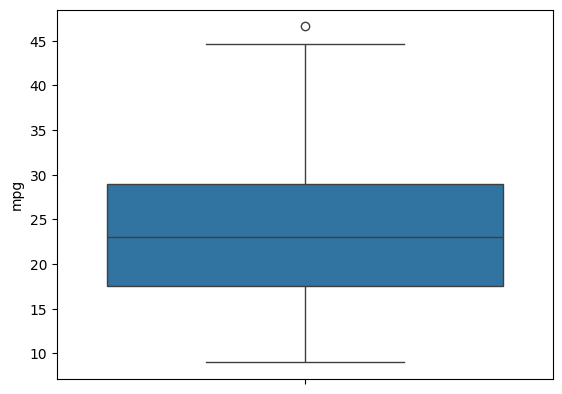

In [46]:
sns.boxplot(df.mpg)

In [47]:
perc99_mpg = df.mpg.quantile(0.99)
perc99_mpg

43.417999999999985

<Axes: ylabel='mpg'>

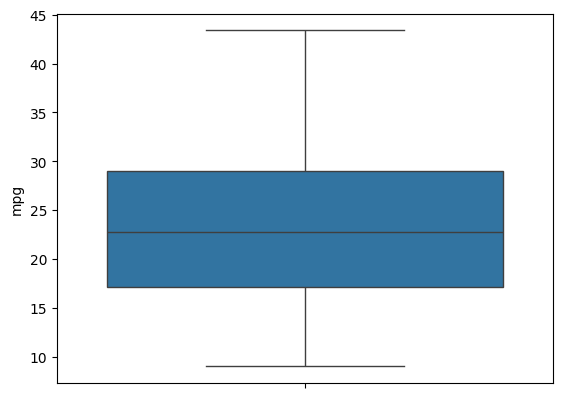

In [48]:
df = df[df.mpg <= perc99_mpg]
sns.boxplot(df.mpg)

In [49]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Encode the Data

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['car name'] = le.fit_transform(df['car name'])

/var/folders/8h/rt74l60d0mlbxd19fjc6gy9m0000gn/T/ipykernel_68604/545994601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car name'] = le.fit_transform(df['car name'])


In [51]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,49
1,15.0,8,350.0,165,3693,11.5,70,1,36
2,18.0,8,318.0,150,3436,11.0,70,1,229
3,16.0,8,304.0,150,3433,12.0,70,1,14
4,17.0,8,302.0,140,3449,10.5,70,1,161


# Split the data into dependent and independent variables

In [52]:
y = pd.DataFrame(df['mpg'])
X = df.iloc[:,1:8]

In [53]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [54]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [55]:
X.shape, y.shape

((394, 7), (394, 1))

# Split the data into training and testing

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [57]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
42,8,383.0,180,4955,11.5,71,1
393,4,140.0,86,2790,15.6,82,1
56,4,91.0,70,1955,20.5,71,1
195,4,85.0,52,2035,22.2,76,1
186,4,101.0,83,2202,15.3,76,2


In [58]:
y_train.head()

,mpg
42,12.0
393,27.0
56,26.0
195,29.0
186,27.0


In [59]:
X_train.shape, y_train.shape

((315, 7), (315, 1))

In [60]:
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
318,4,134.0,90,2711,15.5,80,3
182,4,107.0,86,2464,15.5,76,2
386,6,181.0,110,2945,16.4,82,1
304,4,91.0,69,2130,14.7,79,2
315,4,151.0,90,3003,20.1,80,1


In [61]:
y_test.head()

,mpg
318,29.8
182,28.0
386,25.0
304,37.3
315,24.3


In [62]:
X_test.shape, y_test.shape

((79, 7), (79, 1))

# Build, Train, Test and Evaluate Model

In [63]:
models = {}

In [64]:
# Multi Linear Regression
from sklearn.linear_model import LinearRegression
models['Multi Linear Regression'] = LinearRegression()

In [65]:
# Support Vector Regressor
from sklearn.svm import SVR
models['Support Vector Regressor'] = SVR(kernel='rbf', C=0.5, epsilon=0.1)

In [66]:
# K Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
models['K Neighbors Regressor'] = KNeighborsRegressor(n_neighbors=3)

In [67]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
models['Random Forest Regressor'] = RandomForestRegressor(n_estimators=250, criterion="squared_error", max_depth=None)

In [68]:
from sklearn.metrics import mean_squared_error
rmse = {}
for key in models.keys():
    models[key].fit(X_train, y_train)   
    pred = models[key].predict(X_test)
    rmse[key] = mean_squared_error(pred, y_test, squared=False)

/Users/biggyatpandey/Desktop/data science/projects/applied_datascience_final-20BCE2763--main/flask/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/biggyatpandey/Desktop/data science/projects/applied_datascience_final-20BCE2763--main/flask/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/biggyatpandey/Desktop/data science/projects/applied_datascience_final-20BCE2763--main/flask/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared er

In [69]:
df_model = pd.DataFrame(index=models.keys(), columns=['RMSE'])
df_model['RMSE'] = rmse.values()
df_model

,RMSE
Multi Linear Regression,3.487866
Support Vector Regressor,5.209404
K Neighbors Regressor,4.434033
Random Forest Regressor,2.909661


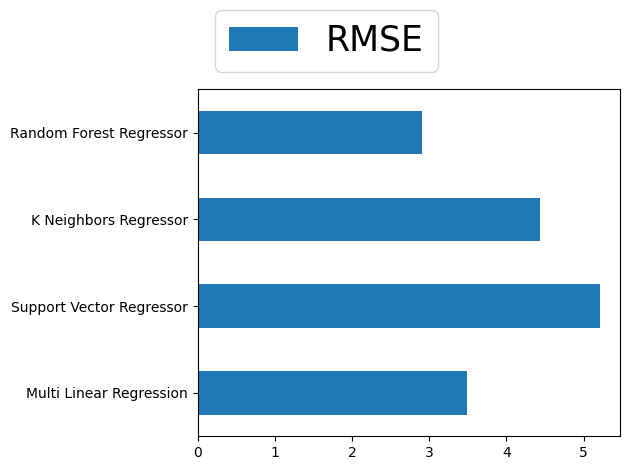

In [70]:
gr = df_model.plot.barh()
gr.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 25}
)
plt.tight_layout()

## We can see that Random Forest Regressor has performed the best. 

In [71]:
rtf = RandomForestRegressor(n_estimators=250, criterion="squared_error", max_depth=None)
rtf.fit(X_train, y_train)   
y_pred = rtf.predict(X_test)
y_pred

/Users/biggyatpandey/Desktop/data science/projects/applied_datascience_final-20BCE2763--main/flask/.venv/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([28.85  , 24.4804, 24.4572, 34.1224, 25.6052, 26.822 , 18.0712,
       31.3552, 14.6272, 17.9628, 14.058 , 13.132 , 17.332 , 17.2272,
       21.81  , 14.306 , 29.2228, 32.4616, 24.1464, 36.9288, 19.632 ,
       30.784 , 14.4116, 23.844 , 16.7296, 31.9516, 29.7828, 35.3328,
       25.7904, 35.9952, 19.3388, 32.6688, 28.5576, 20.4888, 19.4748,
       18.9744, 25.5796, 12.908 , 33.7444, 27.29  , 20.178 , 24.6136,
       23.1508, 28.2104, 19.3644, 24.346 , 33.132 , 27.9764, 12.024 ,
       38.054 , 34.8076, 26.964 , 25.512 , 22.0052, 14.196 , 22.0356,
       34.7972, 25.2228, 15.4316, 17.2868, 20.0612, 15.952 , 30.9792,
       24.2796, 24.6448, 14.17  , 28.784 , 32.568 , 25.4308, 34.234 ,
       27.484 , 29.7992, 19.1504, 33.84  , 13.386 , 23.6236, 18.3436,
       18.7212, 35.2308])

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [73]:
print('Mean Squared Error =',mse)

Mean Squared Error = 8.355347534177202


In [74]:
print('Mean Absolute Error =',mae)

Mean Absolute Error = 2.067387341772154


In [75]:
print('R2 Score =',r2)

R2 Score = 0.8580475509716416


In [76]:
rtf.predict([[6,199,90,2648,15,70,1]]) #Checking the model with sample input

/Users/biggyatpandey/Desktop/data science/projects/applied_datascience_final-20BCE2763--main/flask/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([21.0088])

In [77]:
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(rtf, pickle_out) 
pickle_out.close()